<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/Algorithmic-Trading-Using-Neural-Networks/blob/main/LSTM3layers_2020data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import math 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [3]:
import tensorflow as tf
from tensorflow import keras


In [5]:
print(tf.__version__)

2.9.2


In [6]:
np.random.seed(19)

In [8]:
df=pd.read_csv("df_2020.csv")

In [9]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2020.01.01 23:00:00,1518.768,1520.675,1518.768,1519.895,0.02014,1519.592,1521.245,1519.435,1520.385,0.01987
1,2020.01.01 23:01:00,1519.875,1520.335,1519.595,1520.315,0.00880,1520.385,1520.825,1520.085,1520.805,0.00907
2,2020.01.01 23:02:00,1520.285,1520.305,1520.035,1520.205,0.00640,1520.785,1520.795,1520.525,1520.695,0.00748
3,2020.01.01 23:03:00,1520.185,1520.275,1520.015,1520.275,0.00390,1520.675,1520.765,1520.515,1520.765,0.00417
4,2020.01.01 23:04:00,1520.325,1520.685,1520.195,1520.505,0.00767,1520.825,1521.175,1520.705,1520.985,0.00830


In [10]:
df.tail()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
9638,2020.01.10 21:38:00,1561.148,1561.748,1561.148,1561.648,0.03540,1561.532,1562.115,1561.462,1562.005,0.01204
9639,2020.01.10 21:39:00,1561.648,1561.798,1561.398,1561.505,0.02767,1561.972,1562.155,1561.752,1561.872,0.01632
9640,2020.01.10 21:40:00,1561.508,1562.458,1561.498,1562.298,0.05045,1561.885,1562.822,1561.802,1562.642,0.02693
9641,2020.01.10 21:41:00,1562.285,1562.598,1561.915,1562.598,0.05644,1562.645,1563.002,1562.312,1562.952,0.01840
9642,2020.01.10 21:42:00,1562.598,1563.008,1562.398,1562.398,0.03979,1562.942,1563.352,1562.742,15.000,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643 entries, 0 to 9642
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Local time  9643 non-null   object 
 1   Open_Bid    9643 non-null   float64
 2   High_Bid    9643 non-null   float64
 3   Low_Bid     9643 non-null   float64
 4   Close_Bid   9643 non-null   float64
 5   Volume_Bid  9643 non-null   float64
 6   Open_Ask    9643 non-null   float64
 7   High_Ask    9643 non-null   float64
 8   Low_Ask     9643 non-null   float64
 9   Close_Ask   9643 non-null   float64
 10  Volume_Ask  9642 non-null   float64
dtypes: float64(10), object(1)
memory usage: 828.8+ KB


In [12]:
df['Local time']=df['Local time'].str[0:22]
df['Local time']

0       2020.01.01 23:00:00
1       2020.01.01 23:01:00
2       2020.01.01 23:02:00
3       2020.01.01 23:03:00
4       2020.01.01 23:04:00
               ...         
9638    2020.01.10 21:38:00
9639    2020.01.10 21:39:00
9640    2020.01.10 21:40:00
9641    2020.01.10 21:41:00
9642    2020.01.10 21:42:00
Name: Local time, Length: 9643, dtype: object

In [13]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2


In [14]:
df.shape

(9643, 15)

In [15]:
df=df[:20000]
df.shape

(9643, 15)

In [16]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Open,High,Low,Close
0,2020.01.01 23:00:00,1518.768,1520.675,1518.768,1519.895,0.02014,1519.592,1521.245,1519.435,1520.385,0.01987,1519.180,1520.96,1519.1015,1520.140
1,2020.01.01 23:01:00,1519.875,1520.335,1519.595,1520.315,0.00880,1520.385,1520.825,1520.085,1520.805,0.00907,1520.130,1520.58,1519.8400,1520.560
2,2020.01.01 23:02:00,1520.285,1520.305,1520.035,1520.205,0.00640,1520.785,1520.795,1520.525,1520.695,0.00748,1520.535,1520.55,1520.2800,1520.450
3,2020.01.01 23:03:00,1520.185,1520.275,1520.015,1520.275,0.00390,1520.675,1520.765,1520.515,1520.765,0.00417,1520.430,1520.52,1520.2650,1520.520
4,2020.01.01 23:04:00,1520.325,1520.685,1520.195,1520.505,0.00767,1520.825,1521.175,1520.705,1520.985,0.00830,1520.575,1520.93,1520.4500,1520.745


#### Date transformation

In [17]:
pd.to_datetime(['31/07/2017 22:00:00', 'test'], errors='coerce')

df['Local_time_T'] = pd.to_datetime(df['Local time'], utc=True)

print(df.dtypes)
print(df.head(n=3)) 

Local time                   object
Open_Bid                    float64
High_Bid                    float64
Low_Bid                     float64
Close_Bid                   float64
Volume_Bid                  float64
Open_Ask                    float64
High_Ask                    float64
Low_Ask                     float64
Close_Ask                   float64
Volume_Ask                  float64
Open                        float64
High                        float64
Low                         float64
Close                       float64
Local_time_T    datetime64[ns, UTC]
dtype: object
            Local time  Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  \
0  2020.01.01 23:00:00  1518.768  1520.675  1518.768   1519.895     0.02014   
1  2020.01.01 23:01:00  1519.875  1520.335  1519.595   1520.315     0.00880   
2  2020.01.01 23:02:00  1520.285  1520.305  1520.035   1520.205     0.00640   

   Open_Ask  High_Ask   Low_Ask  Close_Ask  Volume_Ask      Open     High  \
0  1519.592  152

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643 entries, 0 to 9642
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Local time    9643 non-null   object             
 1   Open_Bid      9643 non-null   float64            
 2   High_Bid      9643 non-null   float64            
 3   Low_Bid       9643 non-null   float64            
 4   Close_Bid     9643 non-null   float64            
 5   Volume_Bid    9643 non-null   float64            
 6   Open_Ask      9643 non-null   float64            
 7   High_Ask      9643 non-null   float64            
 8   Low_Ask       9643 non-null   float64            
 9   Close_Ask     9643 non-null   float64            
 10  Volume_Ask    9642 non-null   float64            
 11  Open          9643 non-null   float64            
 12  High          9643 non-null   float64            
 13  Low           9643 non-null   float64            
 14  Close   

In [19]:
data=df.drop(['Local time','Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [20]:
data.head()

,Volume_Bid,Volume_Ask,Open,High,Low,Close,Local_time_T
0,0.02014,0.01987,1519.180,1520.96,1519.1015,1520.140,2020-01-01 23:00:00+00:00
1,0.00880,0.00907,1520.130,1520.58,1519.8400,1520.560,2020-01-01 23:01:00+00:00
2,0.00640,0.00748,1520.535,1520.55,1520.2800,1520.450,2020-01-01 23:02:00+00:00
3,0.00390,0.00417,1520.430,1520.52,1520.2650,1520.520,2020-01-01 23:03:00+00:00
4,0.00767,0.00830,1520.575,1520.93,1520.4500,1520.745,2020-01-01 23:04:00+00:00


In [21]:
data = data.drop('Local_time_T',axis=1)

In [22]:
print(data.head(n=3)) 

   Volume_Bid  Volume_Ask      Open     High        Low    Close
0     0.02014     0.01987  1519.180  1520.96  1519.1015  1520.14
1     0.00880     0.00907  1520.130  1520.58  1519.8400  1520.56
2     0.00640     0.00748  1520.535  1520.55  1520.2800  1520.45


#### Normalisation

In [23]:

#normalization
#data=(data-data.min())/(data.max()-data.min())

In [24]:
data.head()

,Volume_Bid,Volume_Ask,Open,High,Low,Close
0,0.055088,0.049953,0.012380,0.028740,0.019936,0.890108
1,0.024070,0.022802,0.022651,0.024665,0.027903,0.890619
2,0.017505,0.018805,0.027030,0.024344,0.032650,0.890485
3,0.010667,0.010483,0.025895,0.024022,0.032488,0.890570
4,0.020979,0.020866,0.027463,0.028419,0.034484,0.890844


In [25]:
print(data.head(n=5))
print(data[-5:])

   Volume_Bid  Volume_Ask      Open      High       Low     Close
0    0.055088    0.049953  0.012380  0.028740  0.019936  0.890108
1    0.024070    0.022802  0.022651  0.024665  0.027903  0.890619
2    0.017505    0.018805  0.027030  0.024344  0.032650  0.890485
3    0.010667    0.010483  0.025895  0.024022  0.032488  0.890570
4    0.020979    0.020866  0.027463  0.028419  0.034484  0.890844
      Volume_Bid  Volume_Ask      Open      High       Low     Close
9638    0.096827    0.030269  0.468220  0.468120  0.475231  0.940837
9639    0.075684    0.041029  0.473302  0.468603  0.478143  0.940669
9640    0.137992    0.067702  0.472075  0.475718  0.478952  0.941620
9641    0.154376    0.046258  0.480384  0.477434  0.483953  0.941991
9642    0.108835         NaN  0.483682  0.481509  0.488878  0.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643 entries, 0 to 9642
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Volume_Bid  9643 non-null   float64
 1   Volume_Ask  9642 non-null   float64
 2   Open        9643 non-null   float64
 3   High        9643 non-null   float64
 4   Low         9643 non-null   float64
 5   Close       9643 non-null   float64
dtypes: float64(6)
memory usage: 452.1 KB


In [27]:
#downsizing
data['Volume_Bid']=pd.to_numeric(data['Volume_Bid'],downcast='float')
data['Volume_Ask']=pd.to_numeric(data['Volume_Ask'],downcast='float')
data['Open']=pd.to_numeric(data['Open'],downcast='float')
data['High']=pd.to_numeric(data['High'],downcast='float')
data['Low']=pd.to_numeric(data['Low'],downcast='float')
data['Close']=pd.to_numeric(data['Close'],downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643 entries, 0 to 9642
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Volume_Bid  9643 non-null   float32
 1   Volume_Ask  9642 non-null   float32
 2   Open        9643 non-null   float32
 3   High        9643 non-null   float32
 4   Low         9643 non-null   float32
 5   Close       9643 non-null   float32
dtypes: float32(6)
memory usage: 226.1 KB


In [28]:
#visualization
import matplotlib.pyplot as plt
%matplotlib inline

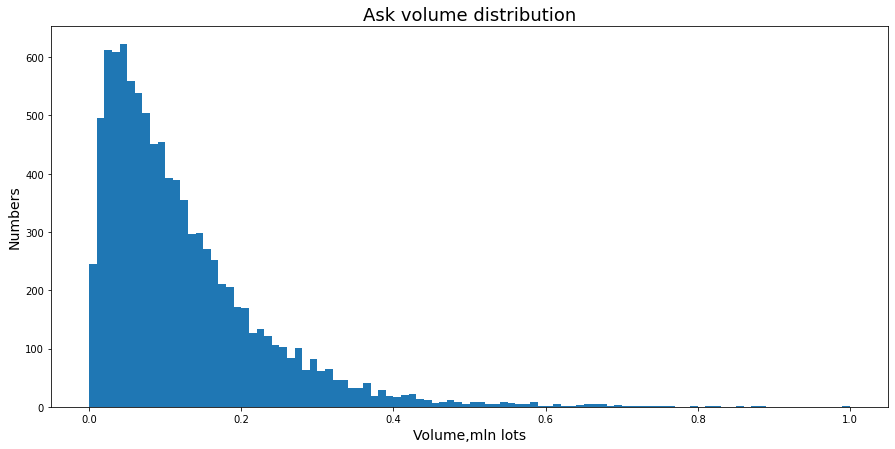

In [29]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Ask volume distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume,mln lots',size=14);

In [30]:
n=data.shape[0]
p=data.shape[1]

In [31]:
print('Rows number is ',n)

Rows number is  9643


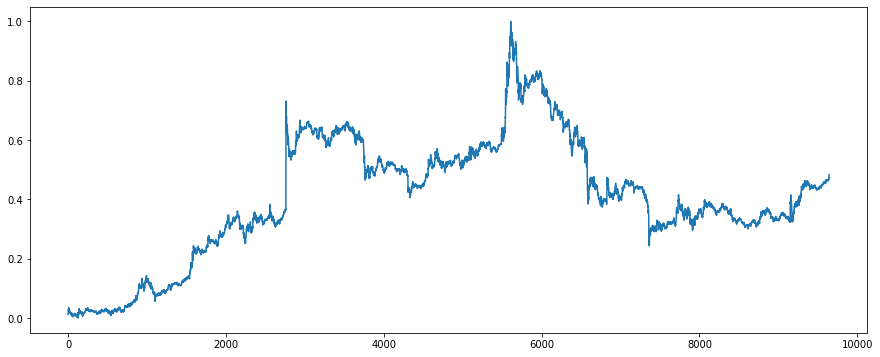

In [32]:
data['Open'].plot(figsize=(15,6))

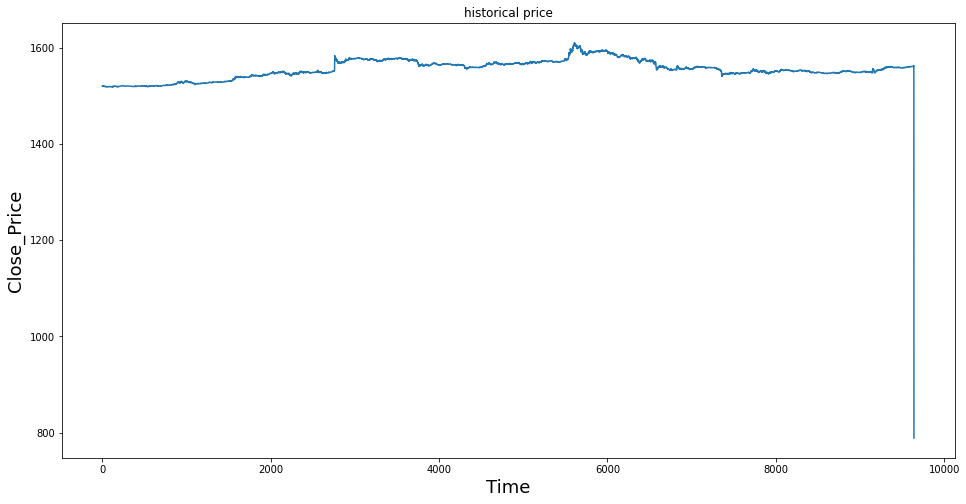

In [33]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [34]:
data_mini = data.iloc[-100:] # Select recent data rows
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data_mini.index, open=data_mini['Open'], high=data_mini['High'], low=data_mini['Low'], close=data_mini['Close'])])
fig.show()


In [35]:

#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))
validation_data_len = int(np.ceil( len(dataset) * .05 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
print(training_data_len)
print(validation_data_len)
print(test_data_len)

8679
483
483


In [36]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [37]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.89010757],
       [0.89061868],
       [0.89048482],
       [0.89057   ],
       [0.89084381]])

In [38]:
data.head()

,Close
0,1520.140
1,1520.560
2,1520.450
3,1520.520
4,1520.745


In [39]:
#downsizing
#data['Open']=pd.to_numeric(data['Open'],downcast='float')
#data['High']=pd.to_numeric(data['High'],downcast='float')
#data['Low']=pd.to_numeric(data['Low'],downcast='float')
#data['Close']=pd.to_numeric(data['Close'],downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643 entries, 0 to 9642
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   9643 non-null   float64
dtypes: float64(1)
memory usage: 75.5 KB


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
## Negative volume implies lack of liquidity in the marketdata
#data[data.Volume_Bid < 0] #no values
print(data.isna().sum())

Close    0
dtype: int64


In [56]:
train_data = scaled_data[0:int(training_data_len), :]
valid_data = scaled_data[int(training_data_len)- 60: int(training_data_len) + int(validation_data_len), :]
print(train_data.shape)
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(8679, 1)
[array([0.89010757, 0.89061868, 0.89048482, 0.89057   , 0.89084381,
       0.89117664, 0.89118272, 0.89147478, 0.89135918, 0.89121497,
       0.89027368, 0.89051098, 0.89001813, 0.88966522, 0.88981125,
       0.88981733, 0.89005463, 0.8903041 , 0.88996945, 0.8899512 ,
       0.88985384, 0.88958612, 0.88993903, 0.8897139 , 0.88945226,
       0.88986601, 0.88962871, 0.88936707, 0.88925755, 0.88961654,
       0.8895922 , 0.8894766 , 0.8894766 , 0.8894766 , 0.88926972,
       0.88887422, 0.88886205, 0.88898983, 0.88886813, 0.88922713,
       0.88936099, 0.88950093, 0.88933665, 0.88911152, 0.88930014,
       0.88889856, 0.88888639, 0.88825967, 0.88853956, 0.88838136,
       0.88838745, 0.8885274 , 0.88857425, 0.88838136, 0.88843613,
       0.88839962, 0.88827793, 0.88829618, 0.88791102, 0.8880388 ])]
[0.8885194850710895]

[array([0.89010757, 0.89061868, 0.89048482, 0.89057   , 0.89084381,
       0.89117664, 0.89118272, 0.89147478, 0.89135918, 0.89121497,
       0.89027368, 0.89051

(8619, 60, 1)

In [57]:
#Split the data into x_valid and y_valid data sets
x_valid = []
y_valid = []

for i in range(60, len(valid_data)):
    x_valid.append(valid_data[i-60:i, 0])
    y_valid.append(valid_data[i, 0])
    if i<= 61:
        print(x_valid)
        print(y_valid)
        print()
        
# Convert the x_valid and y_valid to numpy arrays 
x_valid, y_valid = np.array(x_valid), np.array(y_valid)

#Reshape the data
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape

[array([0.92253066, 0.92280021, 0.92276796, 0.92276371, 0.92276796,
       0.92277405, 0.92262193, 0.92284889, 0.92284281, 0.92262376,
       0.92262376, 0.92262984, 0.92252641, 0.92290365, 0.92287931,
       0.92287931, 0.92328698, 0.92313304, 0.9232018 , 0.92298884,
       0.92300709, 0.92297667, 0.92300709, 0.92306185, 0.92286714,
       0.92311053, 0.92287323, 0.9227558 , 0.92236212, 0.92231344,
       0.92241688, 0.92253857, 0.9230722 , 0.92314643, 0.92315251,
       0.92322553, 0.92324987, 0.92345188, 0.9235468 , 0.92384677,
       0.92360338, 0.92359121, 0.92360338, 0.9238346 , 0.92385285,
       0.92397029, 0.92410232, 0.92413457, 0.92412666, 0.92404756,
       0.92402748, 0.92414065, 0.92428303, 0.92432137, 0.92438221,
       0.92453859, 0.92450208, 0.92466028, 0.92449782, 0.92463777])]
[0.9243882983092674]

[array([0.92253066, 0.92280021, 0.92276796, 0.92276371, 0.92276796,
       0.92277405, 0.92262193, 0.92284889, 0.92284281, 0.92262376,
       0.92262376, 0.92262984, 0.922

(483, 60, 1)

In [58]:
from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_loss')
#es = EarlyStopping(monitor='val_loss', mode='min')
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
#es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [60]:
es = EarlyStopping(monitor='val_mse', mode='min', patience=10, verbose=1)

In [61]:
mc = ModelCheckpoint('LSTM_model_mse.h5', monitor='val_mse', mode='min', save_best_only=True)

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

#Build the LSTM/GRU model
# LSTM Layer returns whole_seq_output, final_memory_state, and final_carry_state 
# GRU Layer whole_sequence_output, and final_state
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(128, return_sequences= True))
model.add(LSTM(256, return_sequences= False))
model.add(Dense(25,activation="relu", kernel_initializer="uniform"))
model.add(Dense(1,activation="relu"))
#model.add(GRU(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

# model.add(GRU(128, return_sequences= True))
# model.add(GRU(256, return_sequences= False))
# model.add(Dense(25,activation="relu", kernel_initializer="uniform"))
# model.add(Dense(1,activation="relu"))
print(model.summary())
# Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')

model.compile(optimizer="adam",loss="mse",metrics=['mse', 'mae', 'mape'])


#Train the model
history = model.fit(x_train, y_train, batch_size=20, validation_data=(x_valid, y_valid), epochs=50, callbacks=[es,mc])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_4 (LSTM)               (None, 60, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 256)               394240    
                                                                 
 dense_2 (Dense)             (None, 25)                6425      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 516,403
Trainable params: 516,403
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
431/431 [=======================

In [63]:
# Evaluate the quality of network training on test data (which the network did NOT see)
scores = model.evaluate(x_valid, y_valid, verbose=0)
# mse, mae, mape = model.evaluate(X_test, y_test, verbose=0)

In [64]:
scores

[1.5830939901206875e-06,
 1.5830939901206875e-06,
 0.0007944069802761078,
 0.08567032217979431]

In [65]:
print("Mean squared error (mse): %.7f %%" % (scores[1]*100))

Mean squared error (mse): 0.0001583 %


In [66]:
print("Mean absolute error (mae): %.3f %%" % (scores[2]*100))

Mean absolute error (mae): 0.079 %


In [67]:
print("Mean absolute percentage error (mape): %.2f %%" % (scores[3]*100))

Mean absolute percentage error (mape): 8.57 %


In [68]:
pred = model.predict(x_valid)


16/16 [==============================] - 1s 6ms/step


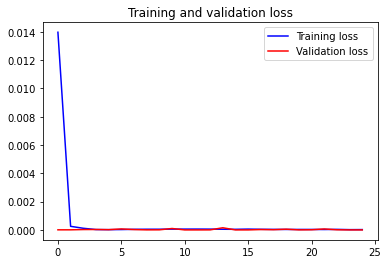

In [69]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss)) 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### MSE graphs during training

Text(0.5, 0, 'Mean Squared Error')

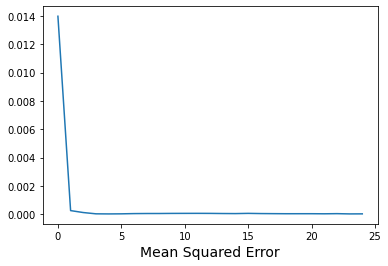

In [73]:
# Training Mean Squared Error (MSE)
plt.plot(history.history['mse'])
#pyplot.plot(history.history['mse'][1:])
plt.xlabel('Mean Squared Error',size=14)

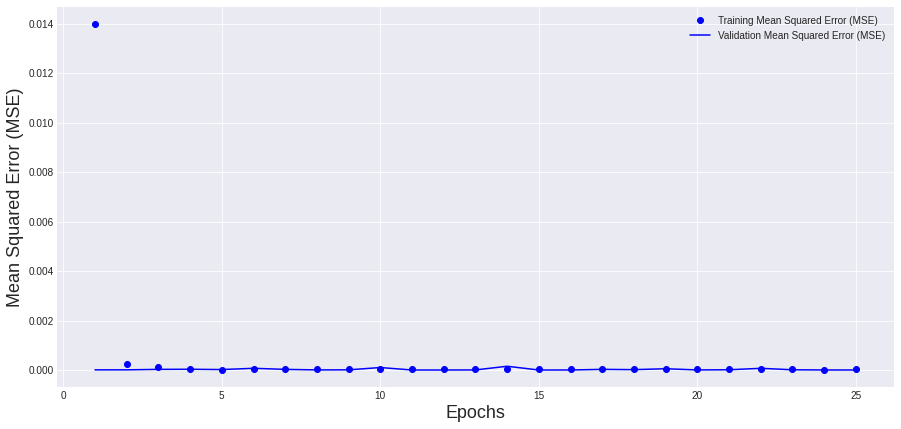

In [74]:
history_dict = history.history
plt.style.use('seaborn-darkgrid') 
mse_values = history_dict['mse']

val_mse_values = history_dict['val_mse']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

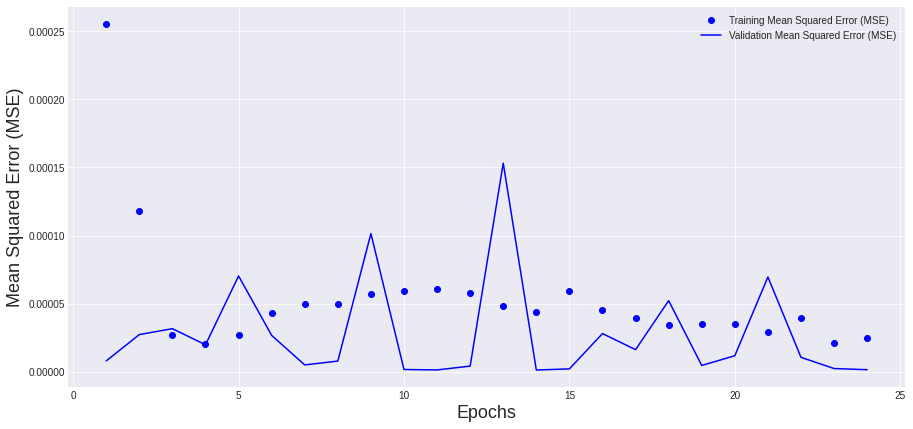

In [75]:
# deleted the first epoch result

history_dict = history.history
plt.style.use('seaborn-darkgrid') 
mse_values = history_dict['mse'][1:]

val_mse_values = history_dict['val_mse'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

#### MAE graphs during training

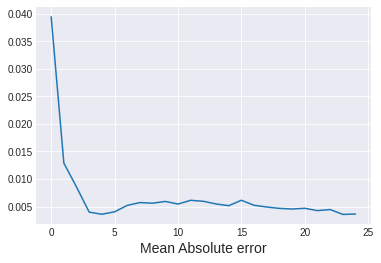

In [89]:
# Training Mean Absolute Error(MAE)

plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error',size=14)
plt.show()

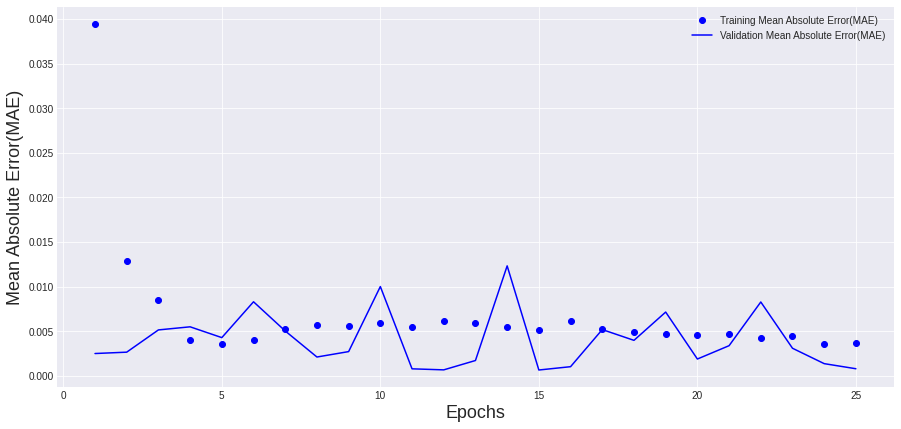

In [79]:
history_dict = history.history
plt.style.use('seaborn-darkgrid') 
mae_values = history_dict['mae']

val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mae_values, 'bo', label='Training Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, 'b', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error(MAE)', size=18)
plt.legend()
plt.show()

#### MAPE graphs during training

Text(0.5, 0, 'Mean Absoulte Percentage Error')

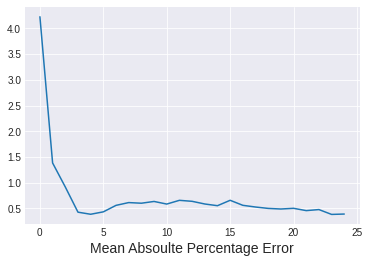

In [81]:
# Training Mean Absolute Percentage Error(MAPE)

plt.plot(history.history['mape'])
plt.xlabel('Mean Absoulte Percentage Error',size=14)

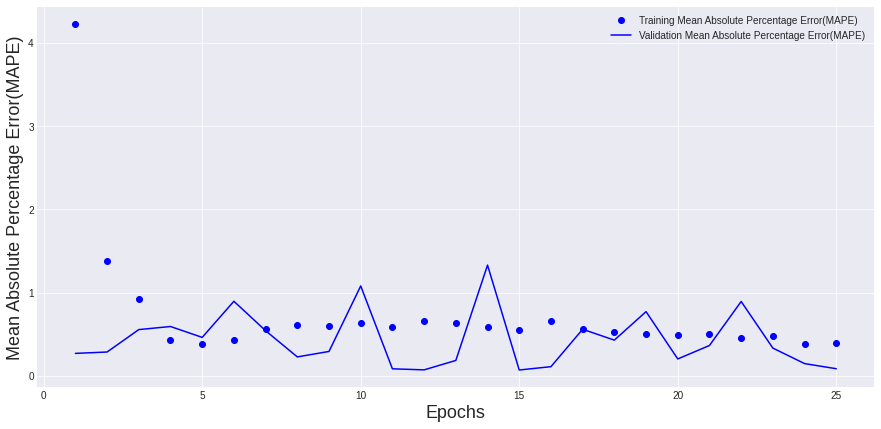

In [82]:
history_dict = history.history
plt.style.use('seaborn-darkgrid') 
mape_values = history_dict['mape']

val_mape_values = history_dict['val_mape']

epochs = range(1, len(mape_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mape_values, 'bo', label='Training Mean Absolute Percentage Error(MAPE)')
plt.plot(epochs, val_mape_values, 'b', label='Validation Mean Absolute Percentage Error(MAPE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Percentage Error(MAPE)', size=18)
plt.legend()
plt.show()

###Accuracy

In [90]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
#es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)

In [91]:
mc = ModelCheckpoint('best_model_accuracy.h5', monitor='val_loss', mode='min', save_best_only=True)
#mc = ModelCheckpoint('best_model_mse.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [92]:
model.compile(optimizer="adam",loss="mse",metrics=['accuracy'])

In [107]:
history_2 = model.fit(x_train, y_train, batch_size=1, epochs=50,
                    validation_split=0.2, shuffle=True,
                      verbose=1, callbacks=[es, mc])


Epoch 1/50
6895/6895 [==============================] - 118s 17ms/step - loss: 5.3371e-05 - accuracy: 1.4503e-04 - val_loss: 2.7965e-05 - val_accuracy: 0.0000e+00
Epoch 2/50
6895/6895 [==============================] - 117s 17ms/step - loss: 3.0962e-05 - accuracy: 1.4503e-04 - val_loss: 1.3759e-05 - val_accuracy: 0.0000e+00
Epoch 3/50
6895/6895 [==============================] - 110s 16ms/step - loss: 2.4245e-05 - accuracy: 1.4503e-04 - val_loss: 6.4064e-05 - val_accuracy: 0.0000e+00
Epoch 4/50
6895/6895 [==============================] - 117s 17ms/step - loss: 3.7044e-05 - accuracy: 1.4503e-04 - val_loss: 9.8613e-07 - val_accuracy: 0.0000e+00
Epoch 5/50
6895/6895 [==============================] - 111s 16ms/step - loss: 1.9925e-05 - accuracy: 1.4503e-04 - val_loss: 3.0496e-06 - val_accuracy: 0.0000e+00
Epoch 6/50
6895/6895 [==============================] - 111s 16ms/step - loss: 1.7241e-05 - accuracy: 1.4503e-04 - val_loss: 1.0489e-05 - val_accuracy: 0.0000e+00
Epoch 7/50
6895/6895 [

In [108]:
# Evaluate the quality of network training on test data (which the network did NOT see)
scores_2 = model.evaluate(x_valid, y_valid, verbose=0)

In [109]:
scores_2

[2.6171701392740943e-06, 0.0]

In [110]:
print("Accuracy: %.2f %%" % (scores_2[1]*100))

Accuracy: 0.00 %


#### Accuracy graphs during training

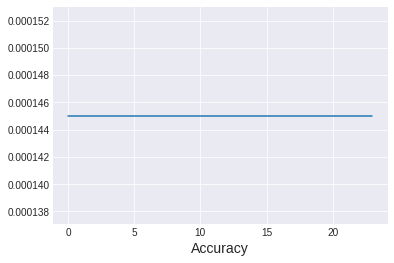

In [111]:
# Training accuracy

plt.plot(history_2.history['accuracy'])
plt.xlabel('Accuracy',size=14)
plt.show()

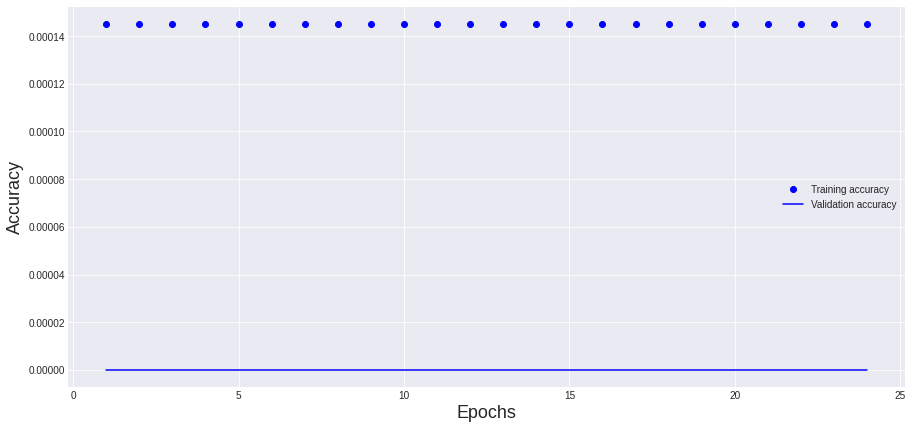

In [112]:
history_dict_2 = history_2.history
plt.style.use('seaborn-darkgrid') 
accuracy_values = history_dict_2['accuracy']

val_accuracy_values = history_dict_2['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy', size=18)
plt.legend()
plt.show()


In [113]:
test_data = scaled_data[training_data_len + validation_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len + validation_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

16/16 [==============================] - 0s 7ms/step


35.3752761187078

In [114]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

2.7904965586830746

In [115]:
mse=np.mean(((predictions - y_test) ** 2))
mse

1251.4101604748184

In [116]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

35.3752761187078

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



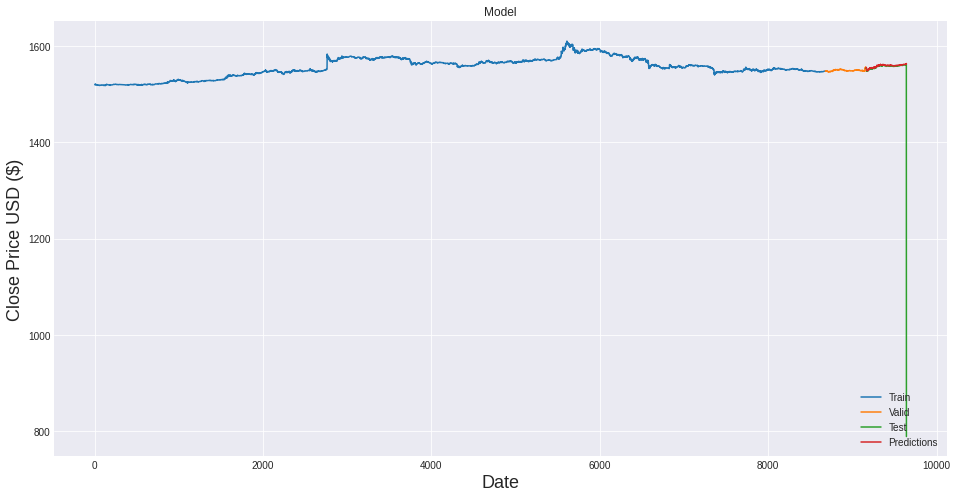

In [117]:
train = data[:training_data_len]
valid = data[training_data_len : training_data_len + validation_data_len]
test = data[training_data_len + validation_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(test[['Close','Predictions' ]])
plt.legend(['Train', 'Valid',  'Test', 'Predictions'], loc='lower right')
plt.show()


In [118]:
y_test[:5]

array([[1554.1215],
       [1554.305 ],
       [1554.555 ],
       [1554.1635],
       [1553.4535]])

In [119]:
predictions[:5]

array([[1554.781 ],
       [1555.1897],
       [1555.4496],
       [1555.8964],
       [1555.5837]], dtype=float32)

In [ ]:
''